In [24]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
nf=pd.read_csv("./Resources/netflix_titles.csv")
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [26]:
nf.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [27]:
nf_shows=nf[nf['type']=='TV Show']

In [28]:
nf_movies=nf[nf['type']=='Movie']

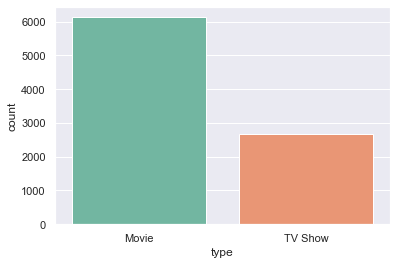

In [29]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=nf, palette="Set2")

In [30]:
# Netflix has over 6,000 movies while only a little over 2,500 series.

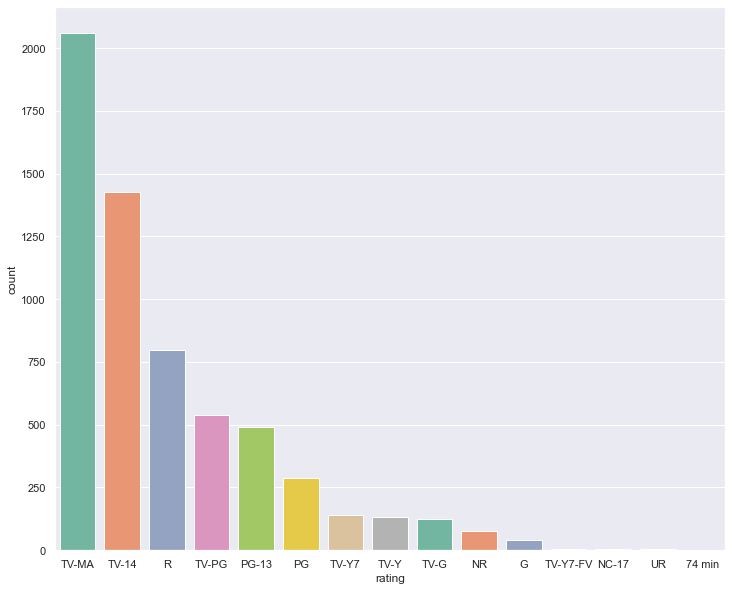

In [31]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=nf_movies, palette="Set2", order=nf_movies['rating'].value_counts().index[0:15])

In [32]:
# TV-MA ratings are assigned to to movies and series which the TV Parental Guidelines declares are for mature audiences.
# TV-14 is for children over 14.
# Most of Netflix's movies carry an R rating.

In [33]:
imdb_ratings=pd.read_csv('./Resources/movies_metadata.csv',usecols=['vote_average'])
imdb_titles=pd.read_csv('./Resources/movies_metadata.csv', usecols=['original_title', 'genres'])
ratings = pd.DataFrame({'Title':imdb_titles.original_title,
                    'Rating': imdb_ratings.vote_average,
                    'Genre':imdb_titles.genres})
ratings.drop_duplicates(subset=['Title','Rating'], inplace=True)
ratings.shape

(45364, 3)

In [34]:
ratings.dropna()
joint_data=ratings.merge(nf,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [35]:
import plotly.express as px
top_rated=joint_data[0:10]
fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

C:\Users\veefe\anacondaanaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\veefe\anacondaanaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [36]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,country
United States,1130
India,233
United Kingdom,110
"United Kingdom, United States",52
"United States, Canada",45
Canada,41
"United States, United Kingdom",31
South Korea,28
"Canada, United States",23
France,22


In [37]:
import plotly.express as px
data = dict(
    number=[1063,619,135,60,44,41,40,40,38,35],
    country=["United States", "India", "United Kingdom", "Canada", "Spain",'Turkey','Philippines','France','South Korea','Australia'])
fig = px.funnel(data, title = 'Number of Releases', x='number', y='country')
fig.show()

In [41]:
countries={}
nf_movies['country']=nf_movies['country'].fillna('Unknown')
cou=list(nf_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

C:\Users\veefe\AppData\Local\Temp\ipykernel_12804\3693366581.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}


[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'France'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Belgium'),
 Text(6, 0, 'China'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'India')]

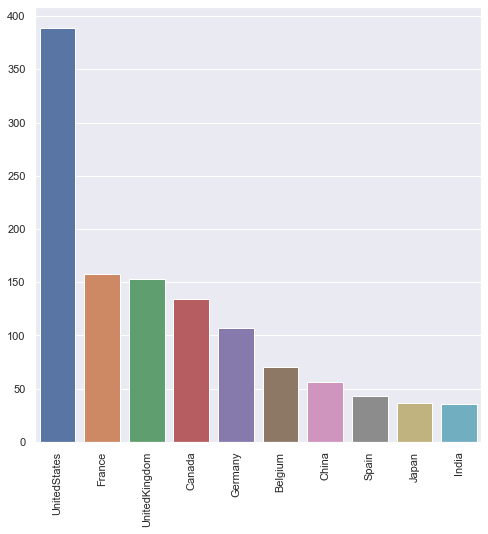

In [43]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)